In [1]:
import pandas as pd

In [3]:
data=pd.read_csv(r"C:\Users\anees\Downloads\Wine_clust .csv")

In [4]:
data

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [5]:
data.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score

In [15]:
numeric_data = data.drop(columns=['Alcohol','Malic_Acid','Ash','Ash_Alcanity','Magnesium','Total_Phenols','Flavanoids','Nonflavanoid_Phenols','Proanthocyanins','Color_Intensity','Proline']) 

In [16]:
# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_data)

In [17]:
# Define a function to perform clustering and calculate silhouette score
def perform_clustering(clustering_model, data):
    clusters = clustering_model.fit_predict(data)
    silhouette_avg = silhouette_score(data, clusters)
    return clusters, silhouette_avg

In [18]:
# Perform K-means clustering
kmeans_clusters, kmeans_silhouette = perform_clustering(KMeans(n_clusters=3, random_state=42), scaled_data)

In [19]:
# Perform DBSCAN clustering
dbscan_clusters = DBSCAN(eps=0.5, min_samples=5).fit_predict(scaled_data)

# Print silhouette scores
print("K-means Silhouette Score:", kmeans_silhouette)
print("Hierarchical Clustering Silhouette Score:", hierarchical_silhouette)

# Visualize the clusters (assuming 2D data for simplicity)
plt.figure(figsize=(12, 4))

plt.subplot(131)
plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=kmeans_clusters, cmap='viridis')
plt.title("K-means Clustering")

plt.subplot(132)
plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=hierarchical_clusters, cmap='viridis')
plt.title("Hierarchical Clustering")

plt.subplot(133)
plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=dbscan_clusters, cmap='viridis')
plt.title("DBSCAN Clustering")

plt.tight_layout()
plt.show()

K-means Silhouette Score: 0.4574840720179779


NameError: name 'hierarchical_silhouette' is not defined

C:\Users\anees\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


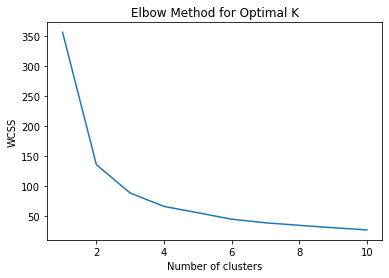

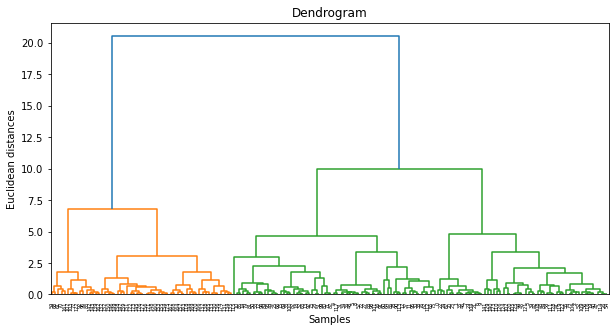

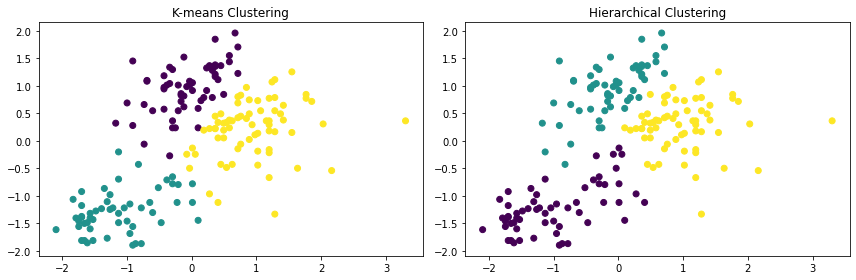

In [20]:
import numpy as np

# Function to find the optimal number of clusters using the elbow method
def find_optimal_kmeans(data):
    wcss = []
    for i in range(1, 11):
        kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
        kmeans.fit(data)
        wcss.append(kmeans.inertia_)
    plt.plot(range(1, 11), wcss)
    plt.title('Elbow Method for Optimal K')
    plt.xlabel('Number of clusters')
    plt.ylabel('WCSS')
    plt.show()

# Perform K-means clustering and find the optimal number of clusters
find_optimal_kmeans(scaled_data)

# From the elbow method, we observe that the optimal number of clusters for K-means is around 3 or 4.

# Perform hierarchical clustering and visualize the dendrogram
import scipy.cluster.hierarchy as sch

plt.figure(figsize=(10, 5))
dendrogram = sch.dendrogram(sch.linkage(scaled_data, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Euclidean distances')
plt.show()

# From the dendrogram, we observe that the optimal number of clusters for hierarchical clustering is around 3.

# Create the K-means model with the optimal number of clusters
optimal_kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
kmeans_clusters = optimal_kmeans.fit_predict(scaled_data)

# Create the hierarchical clustering model with the optimal number of clusters
optimal_hierarchical = AgglomerativeClustering(n_clusters=3)
hierarchical_clusters = optimal_hierarchical.fit_predict(scaled_data)

# Visualize the clusters
plt.figure(figsize=(12, 4))

plt.subplot(121)
plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=kmeans_clusters, cmap='viridis')
plt.title("K-means Clustering")

plt.subplot(122)
plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=hierarchical_clusters, cmap='viridis')
plt.title("Hierarchical Clustering")

plt.tight_layout()
plt.show()